In [1]:
# pip3 install -U scikit-fuzzy # http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html
# Instalar via terminal

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Número de eleitores

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


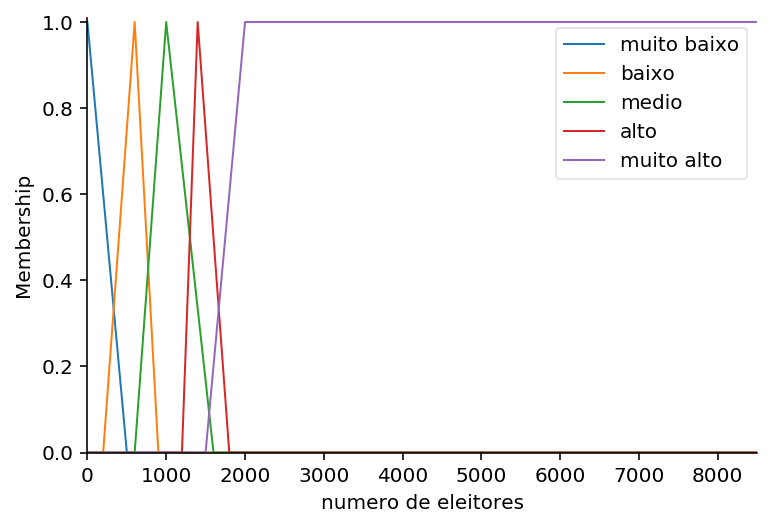

In [3]:
# Número de eleitores
ne = ctrl.Antecedent(np.arange(0, 8501, 1), 'numero de eleitores')

ne['muito baixo'] = fuzz.trimf(ne.universe, [0, 0, 500])
ne['baixo'] = fuzz.trimf(ne.universe, [200, 600, 900])
ne['medio'] = fuzz.trimf(ne.universe, [600, 1000, 1600])
ne['alto'] = fuzz.trimf(ne.universe, [1200, 1400, 1800])
ne['muito alto'] = fuzz.trapmf(ne.universe, [1500, 2000, 8500, 8500])

ne.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


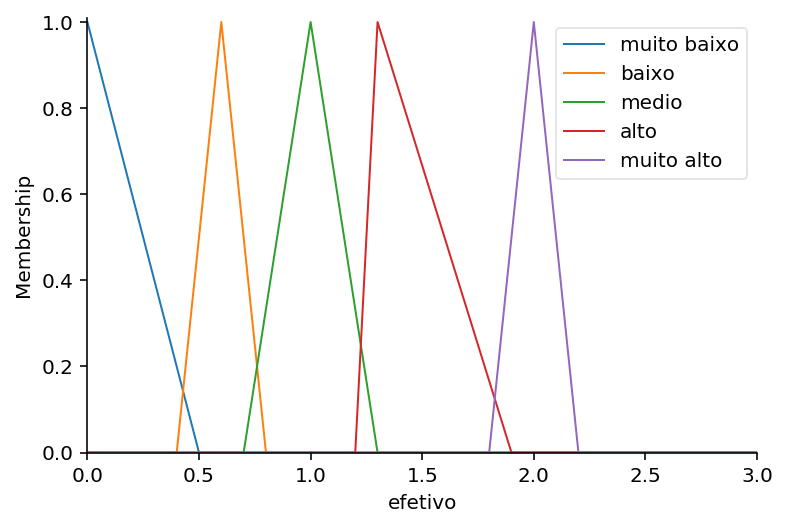

In [4]:
# Estimativa de efetivo (ne)
ef_ne = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_ne['muito baixo'] = fuzz.trimf(ef_ne.universe, [0, 0, 0.5])
ef_ne['baixo'] = fuzz.trimf(ef_ne.universe, [0.4, 0.6, 0.8])
ef_ne['medio'] = fuzz.trimf(ef_ne.universe, [0.7, 1.0, 1.3])
ef_ne['alto'] = fuzz.trimf(ef_ne.universe, [1.2, 1.3, 1.9])
ef_ne['muito alto'] = fuzz.trimf(ef_ne.universe, [1.8, 2.0, 2.2])

ef_ne.view()

In [5]:
# Número de eleitores (ne)
regra_ne_1 = ctrl.Rule((ne['muito alto'] | ne['alto']), ef_ne['muito alto'])
regra_ne_2 = ctrl.Rule(ne['medio'], ef_ne['medio'])
regra_ne_3 = ctrl.Rule(ne['baixo'], ef_ne['baixo'])
regra_ne_4 = ctrl.Rule(ne['muito baixo'], ef_ne['muito baixo'])

In [6]:
## Cria um sistema de controle e uma simulação para o número de eleitores
eleicao_ne_ctrl = ctrl.ControlSystem([regra_ne_1, regra_ne_2, regra_ne_3, regra_ne_4])
eleicao_ne_sim = ctrl.ControlSystemSimulation(eleicao_ne_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


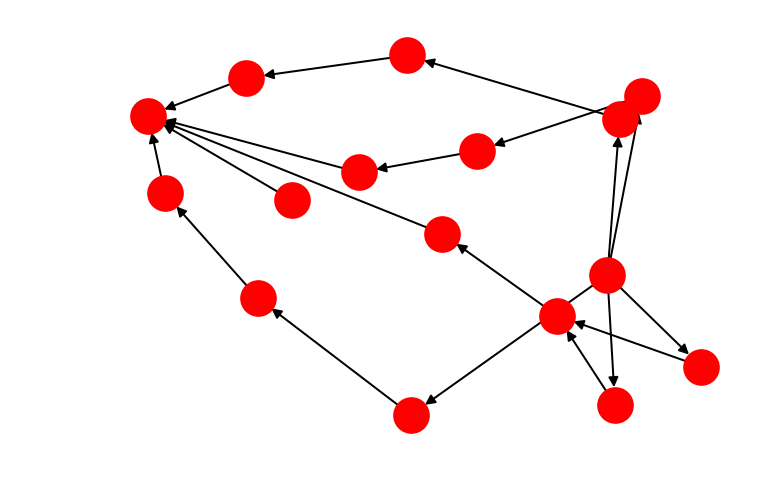

In [7]:
eleicao_ne_ctrl.view()

OrderedDict([('efetivo', 2.0000000000000004)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


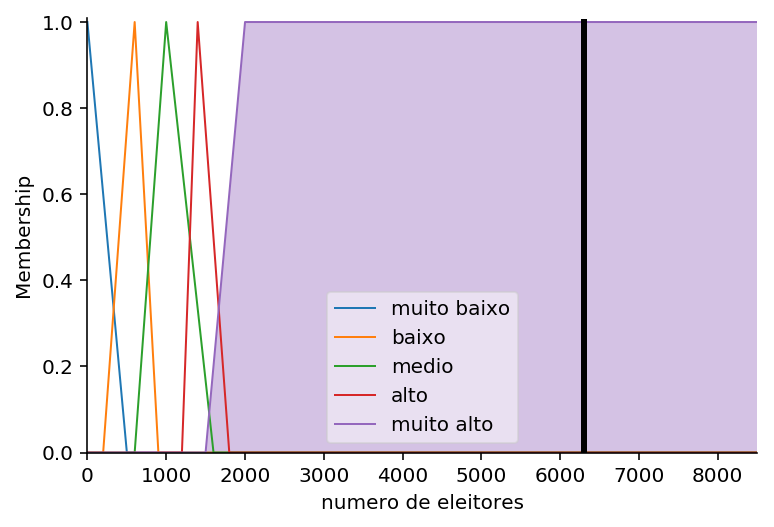

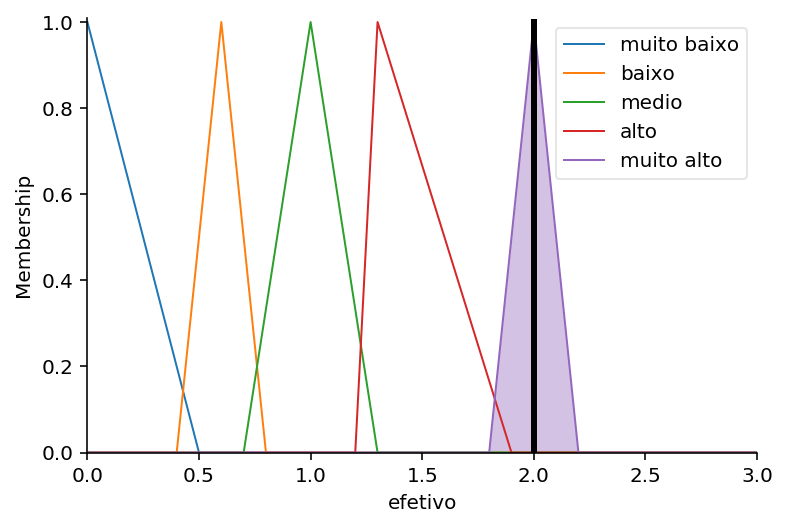

In [8]:
# Entrada
eleicao_ne_sim.input['numero de eleitores'] = 6309

# Calcula
eleicao_ne_sim.compute()
n_ef_ne = eleicao_ne_sim.output
print(n_ef_ne)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ne.view(sim=eleicao_ne_sim)
ef_ne.view(sim=eleicao_ne_sim)

# Eleitores indígenas

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


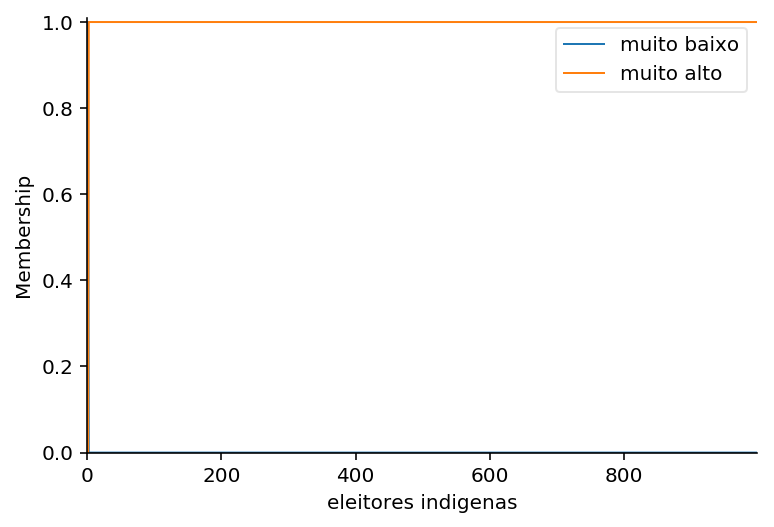

In [9]:
# Eleitores indígenas
ei= ctrl.Antecedent(np.arange(0, 1000, 1), 'eleitores indigenas')

ei['muito baixo'] = fuzz.trapmf(ei.universe, [0, 0, 1, 2])
ei['muito alto'] = fuzz.trapmf(ei.universe, [1, 2, 1000, 1000])

ei.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


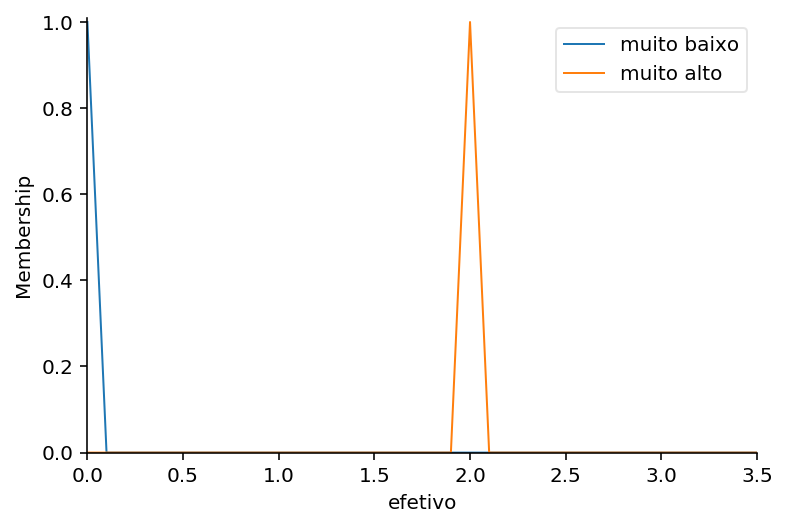

In [10]:
# Estimativa de efetivo (ei)
ef_ei = ctrl.Consequent(np.arange(0, 3.6, 0.1), 'efetivo')

ef_ei['muito baixo'] = fuzz.trimf(ef_ei.universe, [0, 0, 0])
ef_ei['muito alto'] = fuzz.trimf(ef_ei.universe, [2, 2, 2])

ef_ei.view()

In [11]:
# Eleitores indígenas (ei)
regra_ei_ma_1 = ctrl.Rule(ei['muito alto'], ef_ei['muito alto'])
regra_ei_mb_1 = ctrl.Rule(ei['muito baixo'], ef_ei['muito baixo'])

In [12]:
# Cria um sistema de controle e uma simulação para eleitores indígenas
eleicao_ei_ctrl = ctrl.ControlSystem([regra_ei_ma_1, regra_ei_mb_1])
eleicao_ei_sim = ctrl.ControlSystemSimulation(eleicao_ei_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


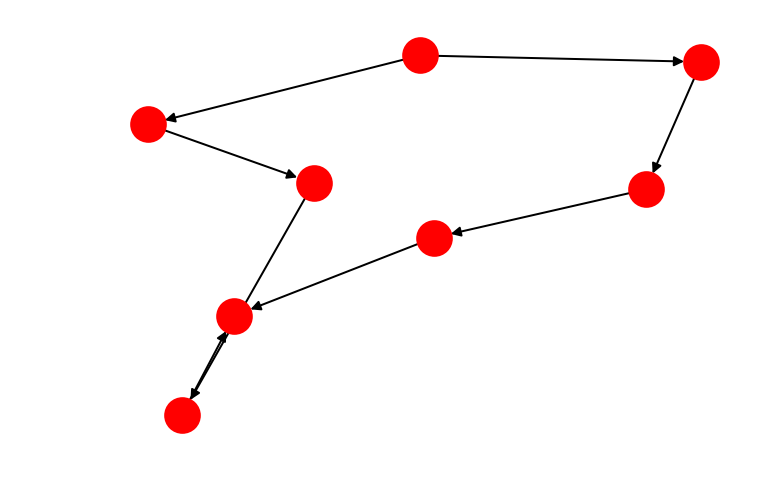

In [13]:
eleicao_ei_ctrl.view()

OrderedDict([('efetivo', 0.03333333333333333)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


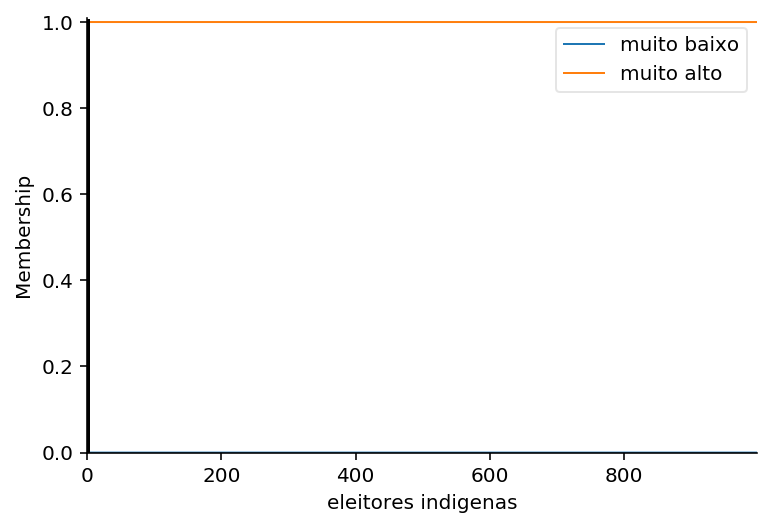

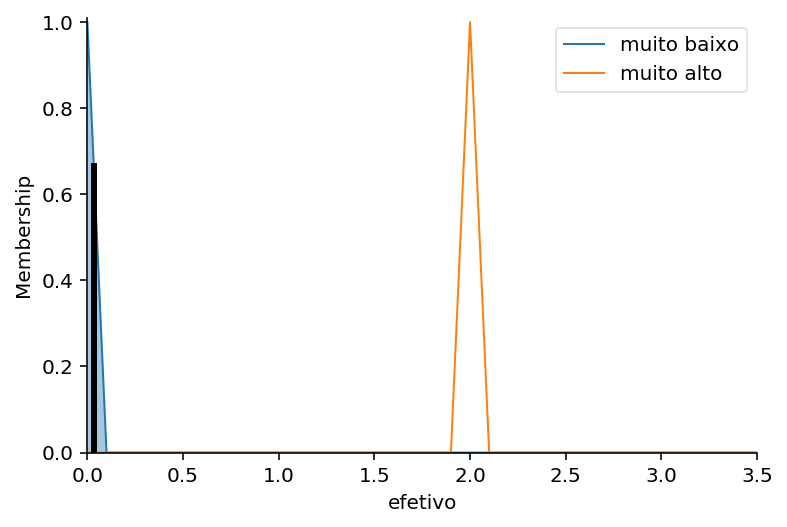

In [14]:
# Entrada
eleicao_ei_sim.input['eleitores indigenas'] = 0

# Calcula
eleicao_ei_sim.compute()
n_ef_ei = eleicao_ei_sim.output
print(n_ef_ei)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ei.view(sim=eleicao_ei_sim)
ef_ei.view(sim=eleicao_ei_sim)

# Modelo final

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


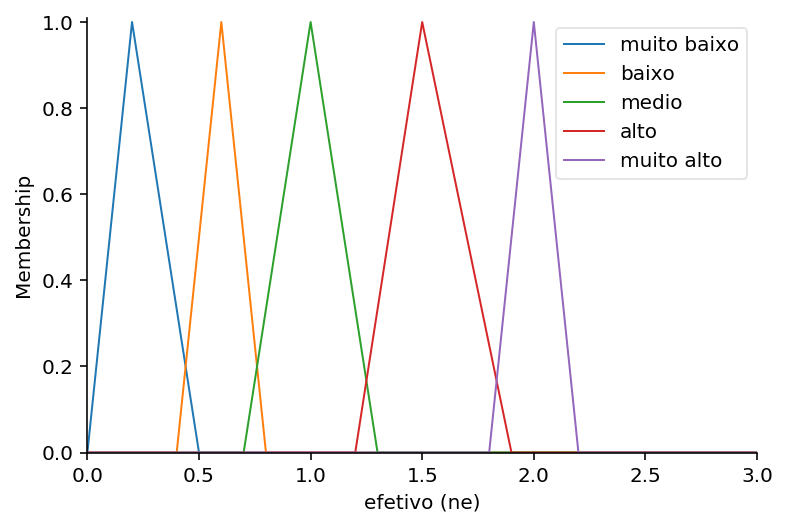

In [15]:
# Estimativa de efetivo (ne) antecedente
ef_ne_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (ne)')

ef_ne_a['muito baixo'] = fuzz.trimf(ef_ne_a.universe, [0, 0.2, 0.5])
ef_ne_a['baixo'] = fuzz.trimf(ef_ne_a.universe, [0.4, 0.6, 0.8])
ef_ne_a['medio'] = fuzz.trimf(ef_ne_a.universe, [0.7, 1.0, 1.3])
ef_ne_a['alto'] = fuzz.trimf(ef_ne_a.universe, [1.2, 1.5, 1.9])
ef_ne_a['muito alto'] = fuzz.trimf(ef_ne_a.universe, [1.8, 2, 2.2])

ef_ne_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


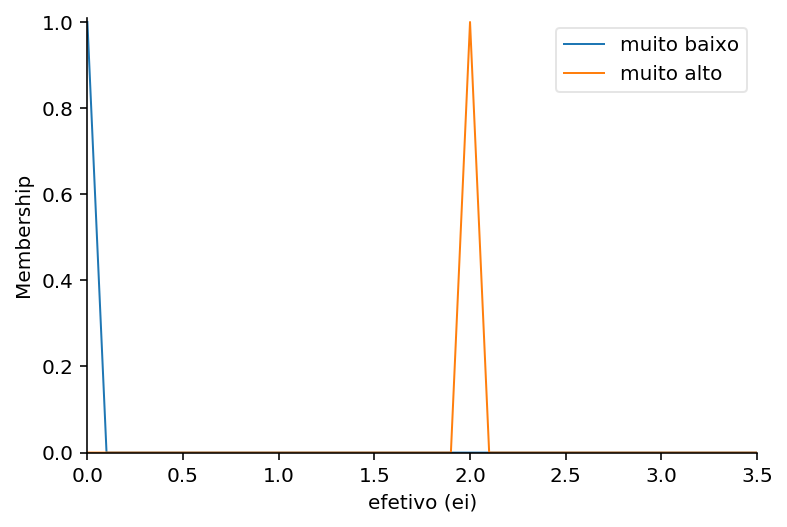

In [16]:
# Estimativa de efetivo (ei) antecedente
ef_ei_a = ctrl.Antecedent(np.arange(0, 3.6, 0.1), 'efetivo (ei)')

ef_ei_a['muito baixo'] = fuzz.trimf(ef_ei_a.universe, [0, 0, 0.1])
ef_ei_a['muito alto'] = fuzz.trimf(ef_ei_a.universe, [2, 2, 2])

ef_ei_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


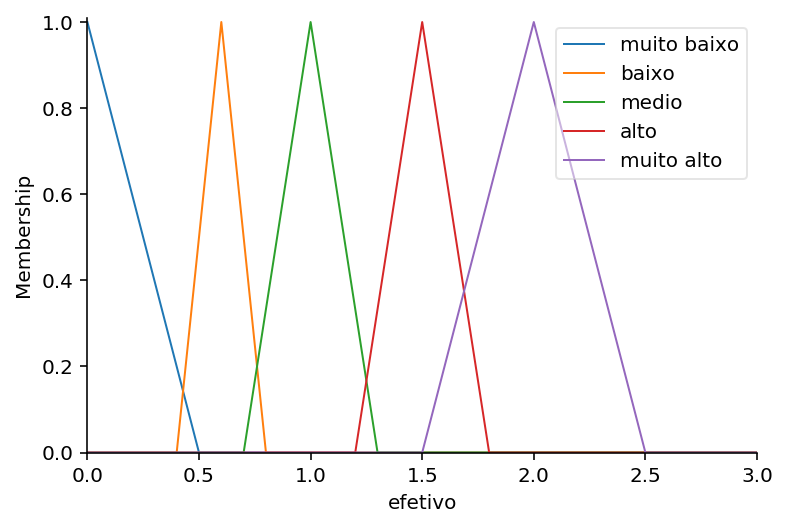

In [17]:
# Estimativa de efetivo (total)
ef = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef['muito baixo'] = fuzz.trimf(ef.universe, [0, 0, 0.5])
ef['baixo'] = fuzz.trimf(ef.universe, [0.4, 0.6, 0.8])
ef['medio'] = fuzz.trimf(ef.universe, [0.7, 1.0, 1.3])
ef['alto'] = fuzz.trimf(ef.universe, [1.2, 1.5, 1.8])
ef['muito alto'] = fuzz.trimf(ef.universe, [1.5, 2.0, 2.5])

ef.view()

In [18]:
# Regras gerais
regra_ma_1 = ctrl.Rule(ef_ne_a['muito alto'] | ef_ei_a['muito alto'], ef['muito alto'])

regra_a_1 = ctrl.Rule(ef_ne_a['alto'] & ef_ei_a['muito baixo'], ef['alto'])

regra_m_1 = ctrl.Rule(ef_ne_a['medio'] & ef_ei_a['muito baixo'], ef['medio'])

regra_b_1 = ctrl.Rule(ef_ne_a['baixo'] & ef_ei_a['muito baixo'], ef['baixo'])

regra_mb_1 = ctrl.Rule(ef_ne_a['muito baixo'] & ef_ei_a['muito baixo'], ef['muito baixo'])

In [19]:
# Cria um sistema de controle e uma simulação total
eleicao_ctrl = ctrl.ControlSystem([regra_ma_1,
                                   regra_a_1,
                                   regra_m_1,
                                   regra_b_1,
                                   regra_mb_1])
eleicao_sim = ctrl.ControlSystemSimulation(eleicao_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


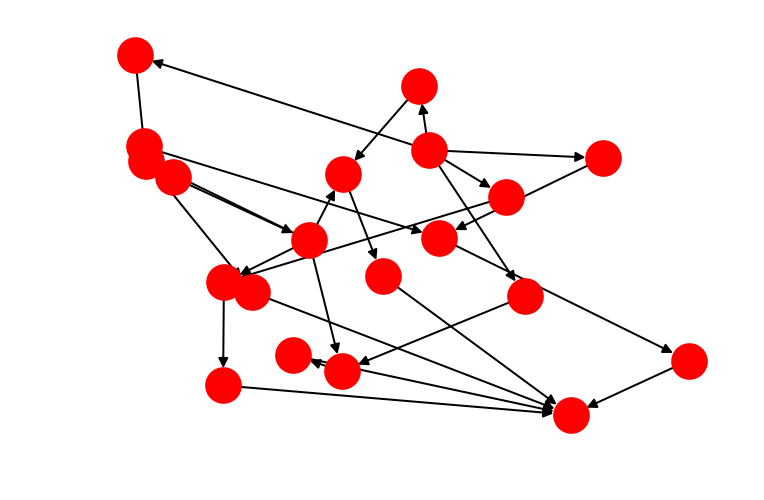

In [20]:
eleicao_ctrl.view()

In [21]:
n_ef_ne['efetivo']

2.0000000000000004

In [22]:
n_ef_ei['efetivo']

0.03333333333333333

OrderedDict([('efetivo', 2.0)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


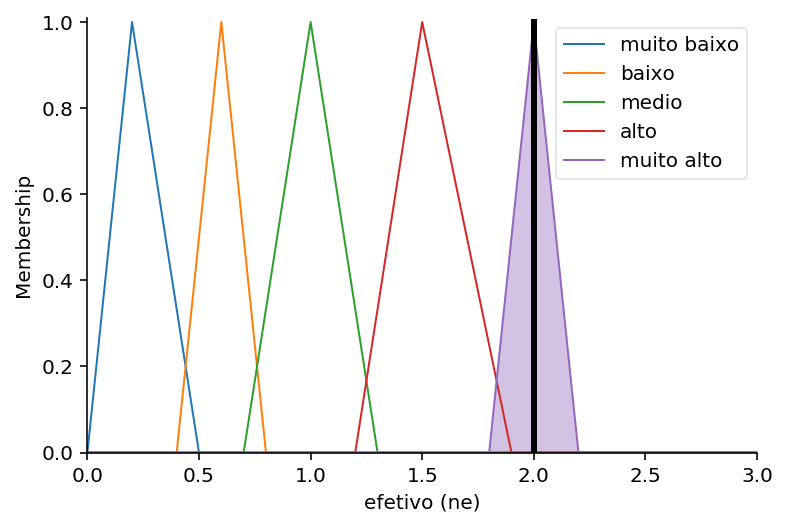

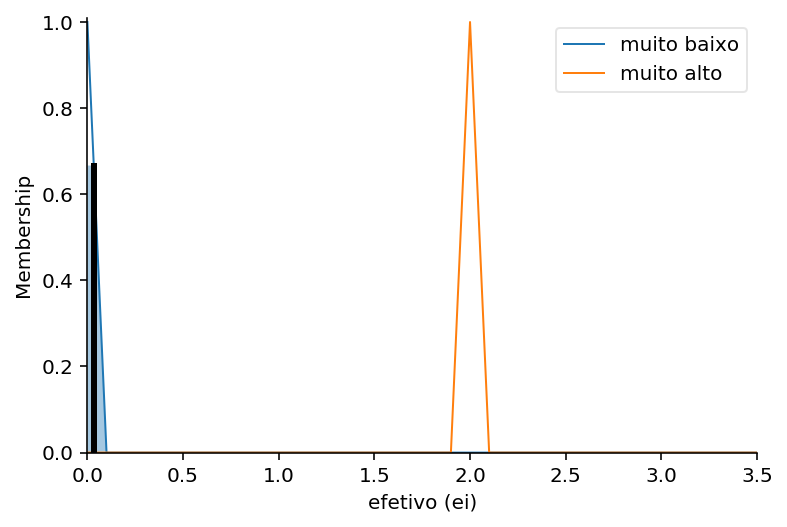

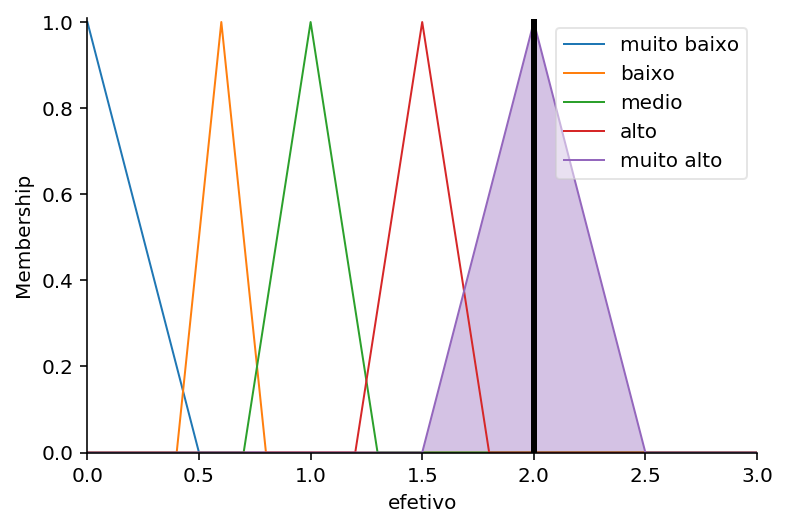

In [23]:
# Entrada
eleicao_sim.input['efetivo (ne)'] = n_ef_ne['efetivo']
eleicao_sim.input['efetivo (ei)'] = n_ef_ei['efetivo']

# Calcula
eleicao_sim.compute()
n_ef = eleicao_sim.output
print(n_ef)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ef_ne_a.view(sim=eleicao_sim)
ef_ei_a.view(sim=eleicao_sim)
ef.view(sim=eleicao_sim)

# Função para entrada e processamento dos dados

In [24]:
def est_ef(cas):
    ## Entrada
    # print(cas)
    # ne
    eleicao_ne_sim.input['numero de eleitores'] = cas[1]
    eleicao_ne_sim.compute()
    n_ef_ne = eleicao_ne_sim.output
    #print('ne: ', n_ef_ne)

    # ei
    eleicao_ei_sim.input['eleitores indigenas'] = cas[2]
    eleicao_ei_sim.compute()
    n_ef_ei = eleicao_ei_sim.output
    #print('ei: ', n_ef_ei)

    ## ef
    eleicao_sim.input['efetivo (ne)'] = n_ef_ne['efetivo']
    eleicao_sim.input['efetivo (ei)'] = n_ef_ei['efetivo']
    eleicao_sim.compute()

    # print('-> ', eleicao_sim.output['efetivo'])
    return(eleicao_sim.output['efetivo'])

In [25]:
#      id    ne   ei
est_ef([1, 6309, 0])

2.0

# Cálculo da planilha

In [26]:
import pandas as pd

In [27]:
df = pd.read_excel('res1.xlsx', sheet_name='dados')

In [28]:
df[:5]

,longitude,latitude,COD_LOCALIDADE_TSE,NOM_LOCALIDADE_1,NOM_BAIRRO,NUM_LOCAL,NOM_LOCAL,DES_ENDERECO,CODIGO,LQTD_SECOES,LQTD_APTOS,INDIGENAS,GRUPOS
0,-56.104889,-15.589418,90670,CUIABÁ,QUILOMBO,2593,COLÉGIO MAXI,"RUA ESTEVÃO DE MENDONÇA, 1000",1906702593,16,6309,0,0
1,-56.098308,-15.592559,90670,CUIABÁ,CENTRO,1015,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...","RUA ZULMIRA CANAVARROS, 95",1906701015,24,4916,0,0
2,-56.081131,-15.579708,90670,CUIABÁ,ALVORADA,2488,ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON,"RUA PIRATININGA, 101",1906702488,12,4571,0,0
3,-56.113951,-15.613200,90670,CUIABÁ,PORTO,2844,ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA,"RUA BARÃO DE MELGACO, 945",1906702844,13,4471,0,0
4,-56.128743,-15.618736,90670,CUIABÁ,COOPHAMIL,2810,ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ...,"RUA JOÃO PAULO DOS SANTOS, S/N",1906702810,12,4308,0,0


In [29]:
df[['CODIGO','LQTD_APTOS','INDIGENAS']][:5]

,CODIGO,LQTD_APTOS,INDIGENAS
0,1906702593,6309,0
1,1906701015,4916,0
2,1906702488,4571,0
3,1906702844,4471,0
4,1906702810,4308,0


In [30]:
df[['CODIGO','LQTD_APTOS','INDIGENAS']][340:355]

,CODIGO,LQTD_APTOS,INDIGENAS
340,12905061058,3224,0
341,12905061023,3055,0
342,12905061112,2603,0
343,12905061120,2527,0
344,12905061104,2277,0
345,12907191015,1879,0
346,12905061139,1877,0
347,12907191031,1627,0
348,12907191023,1289,0
349,12907191082,1277,0


In [31]:
df['EFETIVO'] = df[['CODIGO','LQTD_APTOS','INDIGENAS']].apply(est_ef, axis = 1)

In [32]:
df[348:350]

,longitude,latitude,COD_LOCALIDADE_TSE,NOM_LOCALIDADE_1,NOM_BAIRRO,NUM_LOCAL,NOM_LOCAL,DES_ENDERECO,CODIGO,LQTD_SECOES,LQTD_APTOS,INDIGENAS,GRUPOS,EFETIVO
348,-54.922355,-15.809898,90719,DOM AQUINO,CENTRO,1023,E. M. PROF. JULIANA NAZARÉ DE OLIVEIRA,AVENIDA PRESIDENTE VARGAS S/N,12907191023,6,1289,0,59,1.5
349,-54.922355,-15.809898,90719,DOM AQUINO,VILA ESPORTIVA,1082,ESCOLA ESTADUAL VINÍCIUS DE MORAES,AVENIDA JOÃO FURTADO DE MENDONÇA,12907191082,4,1277,0,59,1.5


In [33]:
df[:5]

,longitude,latitude,COD_LOCALIDADE_TSE,NOM_LOCALIDADE_1,NOM_BAIRRO,NUM_LOCAL,NOM_LOCAL,DES_ENDERECO,CODIGO,LQTD_SECOES,LQTD_APTOS,INDIGENAS,GRUPOS,EFETIVO
0,-56.104889,-15.589418,90670,CUIABÁ,QUILOMBO,2593,COLÉGIO MAXI,"RUA ESTEVÃO DE MENDONÇA, 1000",1906702593,16,6309,0,0,2.0
1,-56.098308,-15.592559,90670,CUIABÁ,CENTRO,1015,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...","RUA ZULMIRA CANAVARROS, 95",1906701015,24,4916,0,0,2.0
2,-56.081131,-15.579708,90670,CUIABÁ,ALVORADA,2488,ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON,"RUA PIRATININGA, 101",1906702488,12,4571,0,0,2.0
3,-56.113951,-15.613200,90670,CUIABÁ,PORTO,2844,ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA,"RUA BARÃO DE MELGACO, 945",1906702844,13,4471,0,0,2.0
4,-56.128743,-15.618736,90670,CUIABÁ,COOPHAMIL,2810,ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ...,"RUA JOÃO PAULO DOS SANTOS, S/N",1906702810,12,4308,0,0,2.0


In [34]:
res2 = pd.ExcelWriter('res2.xlsx')
df.to_excel(res2,'dados',index=False)
res2.save()